### Zadanie 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [2]:
#1
X = data.values[:, :2].T
y = data.values[:, 2:].T
theta = np.zeros((X.shape[0]+1, 1))
X = np.concatenate([np.ones([1, X.shape[1]]), X])
for i in range(1, X.shape[0]):
    X[i, :] = (X[i, :] - np.mean(X[i, :])) / (np.std(X[i, :]))

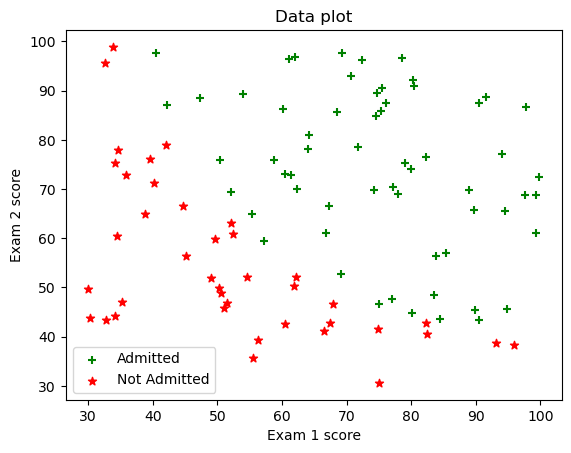

In [3]:
#2
data_Admitted = data.loc[(data['Admitted'] == 1)]
data_Not_Admitted = data.loc[(data['Admitted'] == 0)]
plt.scatter(data_Admitted['Exam 1'], data_Admitted['Exam 2'], label = 'Admitted', marker='+', color='green')
plt.scatter(data_Not_Admitted['Exam 1'], data_Not_Admitted['Exam 2'], label = 'Not Admitted', marker='*', color='red')
plt.legend()
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Data plot')
plt.legend()
plt.show()

In [4]:
#3
def sig(t):
    out = 1/(1 + np.exp(- t))
    return out
    
def calculate_h(X, theta):
    h = sig(np.transpose(theta) @ X)
    return h

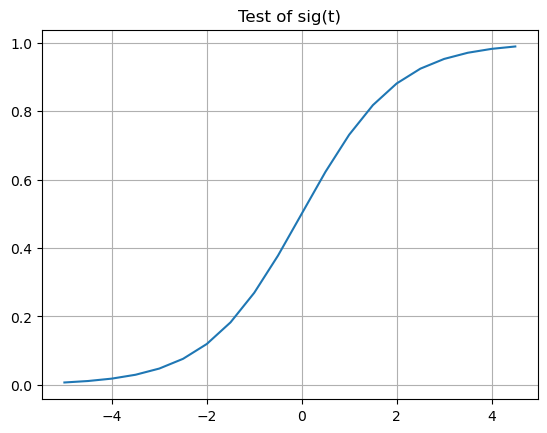

In [5]:
#4
simple_data = np.arange(-5, 5, 0.5)
plt.plot(simple_data, sig(simple_data))
plt.title('Test of sig(t)')
plt.grid()
plt.show()

In [6]:
#5
def computeCost(X, y, theta):
    eps=10e-5
    h = sig(theta.T @ X)
    y_1 = -y*np.log(h+eps)
    y_0 = (1-y)*np.log(1-h+eps)
    J = (y_1 - y_0).sum() / y.shape[1]
    return J

In [7]:
theta = np.zeros((X.shape[0], 1))

In [8]:
print(round(computeCost(X, y, theta), 2))

0.69


In [9]:
#6
def simple_gradient(X, y, theta, alpha=1, it=150):
    cost = []
    for i in range(it):
        for j in range(X.shape[0]):
            theta[j] = theta[j] - alpha / X.shape[1] * (sig(theta.T@X) - y) @ (X[j,:]).T
    cost.append(computeCost(X,y,theta))
       
    return theta, cost

In [10]:
theta, cost = simple_gradient(X, y, theta)
print(f'Theta: {theta}')
print(f'Cost: {round(cost[-1],2)}')

Theta: [[1.42929788]
 [3.38040725]
 [3.13521188]]
Cost: 0.21


In [11]:
#7
preds = np.round(sig(theta.T @ X))
correct = (preds == y).astype(int).sum()
acc = correct / X.shape[1]
print(f'Accuracy = {acc}')

Accuracy = 0.89


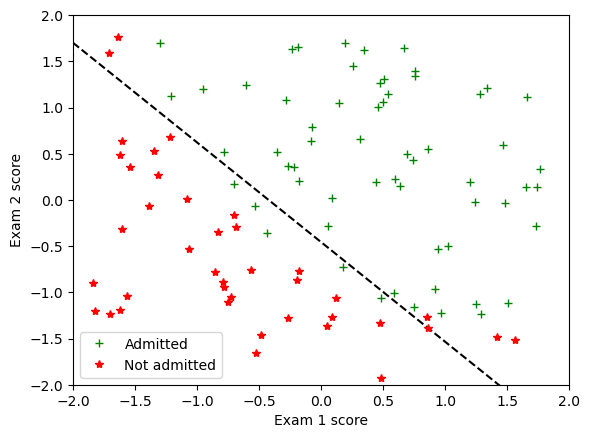

In [12]:
#8
x1 = x1 = np.arange(-2.0, 2.0, 0.1)
x2 = -theta[0, 0]/theta[2, 0] - (theta[1, 0]/theta[2, 0]*x1)

plt.plot(x1, x2, 'k--')
X1_1 = X[1, y[0, :] == 1.0]
X2_1 = X[2, y[0, :] == 1.0]
X1_0 = X[1, y[0, :] == 0.0]
X2_0 = X[2, y[0, :] == 0.0]
plt.plot(X1_1, X2_1, 'g+', label='Admitted')
plt.plot(X1_0, X2_0, 'r*', label='Not admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.xlim((-2.0, 2.0))
plt.ylim((-2.0, 2.0))
plt.legend()
plt.show()

### Zadanie 2

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
 
iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target

In [14]:
#1
from sklearn.model_selection import train_test_split

# Split into train and test sets (70-30%)
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.80, test_size=0.20, random_state=40)
 
# Creating an object 
logreg = LogisticRegression(solver='lbfgs', max_iter=100000)
 
# Learning model on training data
logreg.fit(X_train, y_train)
# Predicting values using test data
Y_predicted = logreg.predict(X_test)
 
# Regression coefficients (theta)
print('Coefficients: \n', logreg.coef_)

Coefficients: 
 [[-2.51537625  2.16052105]
 [ 0.64803905 -1.2536498 ]
 [ 1.8673372  -0.90687124]]


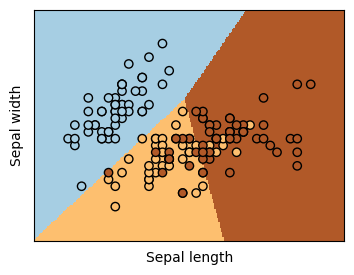

In [16]:
#2
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
step = 0.02  
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()

In [17]:
#3
print(f'Porbability of being in class 1: {logreg.predict_proba(X[:1, :])[0,0]}')
print(f'Porbability of being in class 2: {logreg.predict_proba(X[:1, :])[0,1]}')
print(f'Porbability of being in class 3: {logreg.predict_proba(X[:1, :])[0,2]}')

Porbability of being in class 1: 0.9145817175471185
Porbability of being in class 2: 0.06493232931871223
Porbability of being in class 3: 0.02048595313416921


In [18]:
#4
from sklearn.metrics import accuracy_score
print(f'Accuracy score: {accuracy_score(y_train, logreg.predict(X_train))}')

from sklearn.model_selection import cross_val_score

print(f'Cross-Validation Accuracy Scores : {cross_val_score(logreg, X_train, y_train, cv=10)}')

error = np.mean((Y_predicted - y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Accuracy score: 0.8083333333333333
Cross-Validation Accuracy Scores : [0.58333333 0.91666667 0.75       0.83333333 0.83333333 0.75
 0.83333333 0.91666667 0.75       0.83333333]
Residual sum of squares: 0.06666666666666667
